# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Marsa Sawaisabel
- **Email:** marsaisabel4217@gmail.com
- **ID Dicoding:** marsaisabelll

## Menentukan Pertanyaan Bisnis

- How is the user's segmentation in 2012?
- How is the impact of rush hours (9 A.M - 5 P.M) on bike rental demand during weekdays in 2012 for registered user?
- How much percentage of bycicle rental's demand across seasons in 2012 for registered user?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

## Data Wrangling

### Gathering Data

In [21]:
hour_df = pd.read_csv("hour.csv")
print("\nHour Data: ")
hour_df.head()


Hour Data: 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
print(hour_df.shape)

(17379, 17)


**Insight:**
- Both day.csv & hour.csv have the same following field, except for hour.csv is more complete (containing hr column) than the day.csv
- day.csv has 731 rows and 16 columns.Plus, the hour.csv has bigger data than day.csv, it has 17.379 rows and 17 columns.
- Seasons column has 1-4 value range (1: Spring, 2: Summer, 3: Fall, 4: Winter).
- Year (yr) column has binary value (0: 2011, 1: 2012).
- Month (mnth) column has 1-12 value range, each number stands month from January - December.
- Hour (hr) column has 0-23 value range.
- Holiday & workingday have binary value (0: No, 1: Yes).
- Weekday column has 0-6 value range (0: Sunday, ..., 6: Saturday).
- Due to analysis purpose, I only used hour.csv for its detail information.

### Assessing Data

In [23]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
print("Jumlah duplikat: ", hour_df.duplicated().sum())

Jumlah duplikat:  0


In [26]:
print("Jumlah null: ", hour_df.isna().sum())

Jumlah null:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- There's data type error for dtetime. It should declared as datetime which is not object.
- day.csv & hour.csv files do not have duplicate data and null data.

### Cleaning Data

In [27]:
# (1) Define: Data type error on dtetime, it should be datetime not object.

# (2) Code: Mengganti tipe data.
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

# (3) Test: data type checking
hour_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- The error data type at 'dtetime' already solved.

## Exploratory Data Analysis (EDA)

### Explore ...

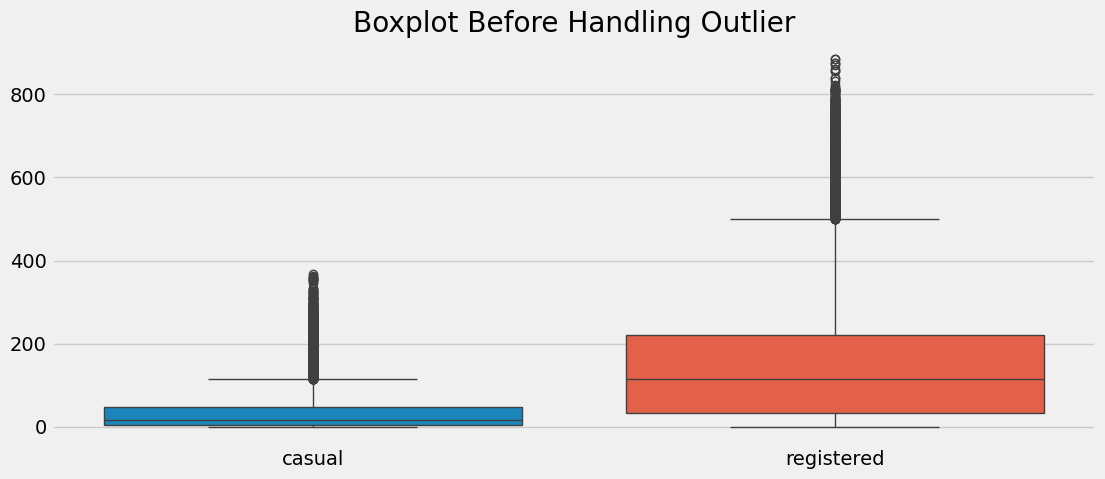

The casual column has 1192 outlier
The registered column has 1821 outlier


In [28]:
# Deklarasi kolom casual dan registered
cas_user = "casual"
reg_user = "registered"

# Visualisasi awal dengan boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(data=hour_df[[cas_user, reg_user]])
plt.title("Boxplot Before Handling Outlier")
plt.show()

# Identifikasi outlier dengan IQR method
for column in [cas_user, reg_user]:
    Q1, Q3 = hour_df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    hour_df.loc[(hour_df[column] < lower) | (hour_df[column] > upper), "is_outlier"] = True
    
    # Tampilkan informasi outlier
    outlier_count = hour_df["is_outlier"].sum()
    print(f"The {column} column has {outlier_count} outlier")

**Insight:**
Before handling the outlier, this boxplot is made for getting some insights about user columns (casual and registered) in order to help further analysis for the first question visualization.

**Casual User (Blue)**
- The median value (17) is closer to Q1 (4) compared to Q3 (48) indicates a right skewed distribution which less representative.
- There are many outliers above the upper bound (Q3 + 1.5*IQR), indicate certain hours with significant spikes in casual users (most likely during peak hours or weekends).

**Registered User (Orange)**
- The median value (115) is midway between Q1 (34) and Q3 (220), indicating a more balanced distribution compared to casual users.
- The IQR range (34 - 220) is quite large, indicating that rentals by registered users have more variation throughout the day.
- The large number of outliers above Q3 (220), indicating peak hours of high demand on bicycle rental which may happen during working hours or commuting times.

**Summary**
- Both have outliers but registered users tend to be consistently higher than casual users.
- This difference in distribution indicates that registered users have more stable and regular usage patterns, while casual users are more volatile and more often influenced by external factors such as weather or holidays.

The casual column has 1192 outlier
The registered column has 1821 outlier


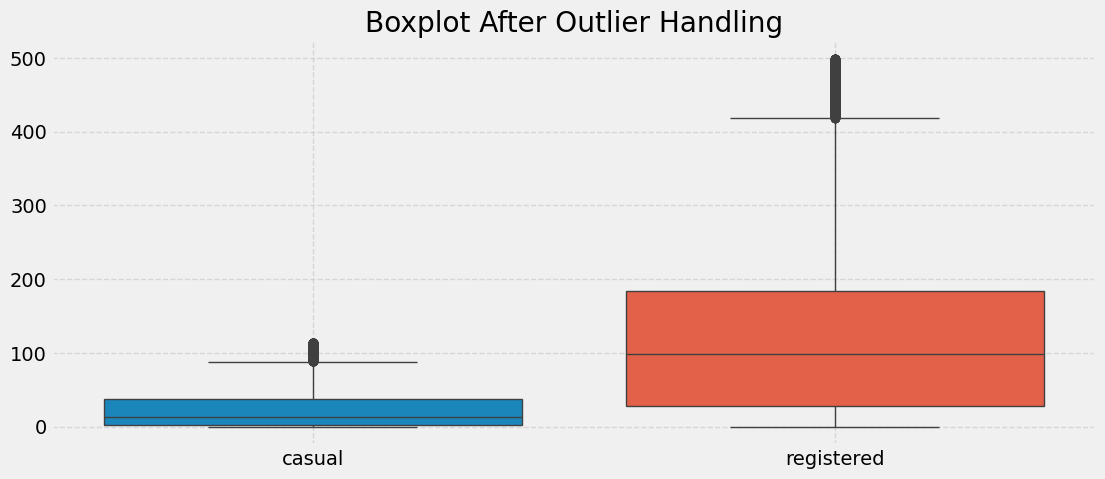

In [29]:
hour_df["is_outlier"] = False

# Identifikasi outlier dengan IQR method
for column in [cas_user, reg_user]:
    Q1, Q3 = hour_df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    hour_df.loc[(hour_df[column] < lower) | (hour_df[column] > upper), "is_outlier"] = True
    
    outlier_count = hour_df["is_outlier"].sum() # Menampilkan informasi outlier
    print(f"The {column} column has {outlier_count} outlier")

# Hapus outlier
hour_df_clean = hour_df[hour_df["is_outlier"] == False].drop(columns=["is_outlier"])

# Visualisasi setelah menghapus outlier
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(data=hour_df_clean[[cas_user, reg_user]], ax=ax)
ax.set_title("Boxplot After Outlier Handling")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**

**Casual User (Blue)**
- Most data is concentrated in low values (≤ 50) with a small IQR, indicating casual users engage less frequently.

**Registered User (Orange)**
- Data has a wider IQR and higher median, showing registered users are more active with greater variation.

**Summary**
- Both the casual and registered columns has 1821 outliers.
- Casual users have low, consistent activity, while registered users are more frequent and varied.
- After outlier removal, the boxplot highlights the distinct behavior between the two groups.

In [30]:
# Data for visualize questions
hour_df = pd.read_csv("hour.csv")

data = {
    "dteday": ["2012-01-15", "2012-04-10", "2012-07-20", "2012-10-05"],
    "yr": [1, 1, 1, 1],
    "hr": [9, 10, 15, 16, 17],
    "casual": [2000, 3000, 5000, 4000],  
    "season": [1, 2, 3, 4],  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
    "weekday": [1, 2, 3, 4, 5], # 1=Monday, ..., 5=Friday
    "registered": [5000, 7000, 12000, 9000]  
}

hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Filter data untuk tahun 2012
def filter_by_year(hour_df, year):
    return hour_df[hour_df["dteday"].dt.year == year]

df_filtered_year = filter_by_year(hour_df, 2012)

# Menghitung total pengguna casual dan registered
total_casual = df_filtered_year["casual"].sum()
total_registered = df_filtered_year["registered"].sum()

# Filter hanya jam antara 9 AM - 5 PM dan hari kerja (weekday 1-5)
def filter_by_time_and_weekday(df, start_hour, end_hour):
    return hour_df[(hour_df["hr"] >= start_hour) & (hour_df["hr"] <= end_hour) & (hour_df["weekday"] <= 5)]

df_filtered_time = filter_by_time_and_weekday(df_filtered_year, 9, 17)

# Menghitung persentase permintaan sewa sepeda berdasarkan musim
df_seasonal = df_filtered_year.groupby("season")["registered"].sum().reset_index()
df_seasonal["percentage"] = (df_seasonal["registered"] / df_seasonal["registered"].sum()) * 100


#ANALISIS LANJUTAN
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata untuk setiap variabel
season_cluster_data = hour_df.groupby('season')[['casual', 'registered', 'cnt']].mean().reset_index()

# Normalisasi data untuk clustering (karena casual, registered, dan cnt memiliki skala berbeda)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(season_cluster_data[['casual', 'registered', 'cnt']])

# Membuat model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
season_cluster_data['Cluster'] = kmeans.fit_predict(normalized_data)

## Visualization & Explanatory Analysis

### Question 1: How is the user's segmentation in 2012?

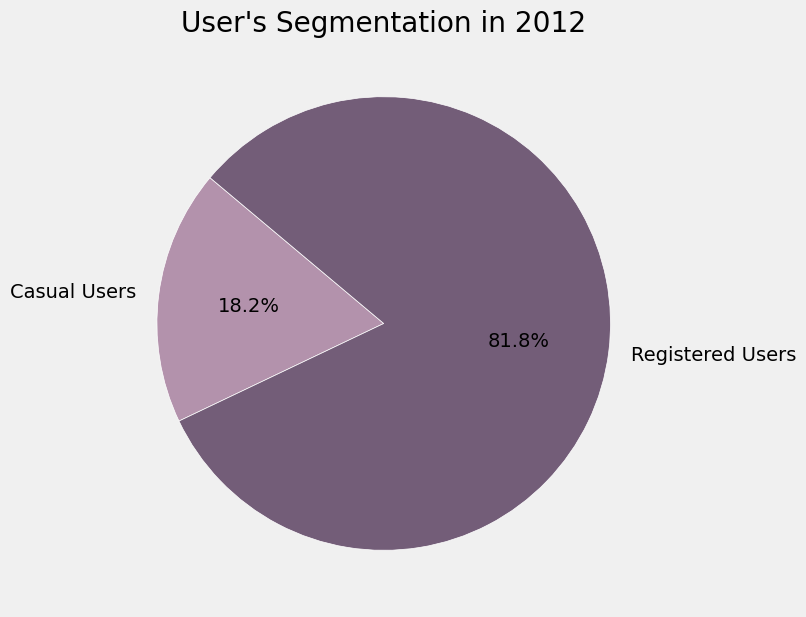

User's Segmentation in 2012:
Casual Users: 372765 (18.2%)
Registered Users: 1676811 (81.8%)


In [31]:
labels = ["Casual Users", "Registered Users"]
sizes = [total_casual, total_registered]
colors = ["#b392ac", "#735d78"]
plt.figure(figsize=(7, 7))
plt.style.use("fivethirtyeight")
plt.pie(sizes, labels=labels, autopct="%.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "white"})
plt.title("User's Segmentation in 2012")
plt.show()

print("User's Segmentation in 2012:")
print(f"Casual Users: {total_casual} ({(total_casual / (total_casual + total_registered)) * 100:.1f}%)")
print(f"Registered Users: {total_registered} ({(total_registered / (total_casual + total_registered)) * 100:.1f}%)")

**Insight:**

1. **Registered Users are the Majority**:
   - Registered users make up **81.8%** of the total users (1,676,811 users). This indicates that most users prefer to create an account and commit to regular usage, likely due to benefits such as convenience, cost savings, or additional features offered to registered users.

2. **Casual Users are a Minority**:
   - Casual users constitute only **18.2%** of the total users (372,765 users). This suggests that fewer users opt for one-time or infrequent usage, possibly due to higher costs for casual rentals or fewer benefits compared to registered users.

3. **Customer Loyalty**:
   - The high percentage of registered users indicates that the service successfully retains users by converting casual users into registered ones, fostering long-term relationships. This might reflect positively on customer satisfaction, the pricing strategy, or the value proposition offered to registered users.

### Question 2: How is the impact of rush hours (9 A.M - 5 P.M) for bike rental demand on weekdays in 2012 for registered user?

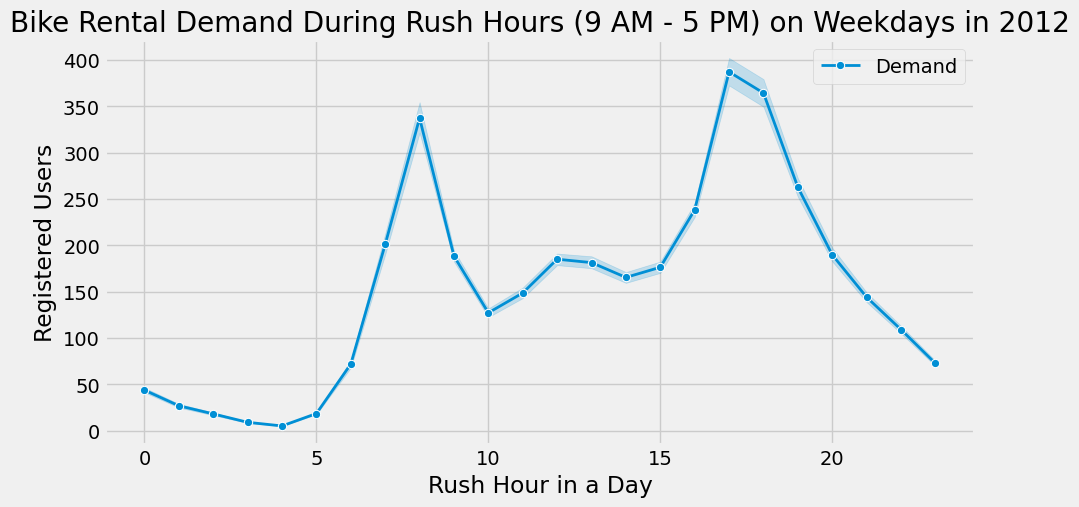

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x="hr", y="registered", marker="o", linewidth=2, label="Demand")
plt.title("Bike Rental Demand During Rush Hours (9 AM - 5 PM) on Weekdays in 2012")
plt.xlabel("Rush Hour in a Day")
plt.ylabel("Registered Users")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.show()

**Insight:**

1. **Morning Peak (8–9 AM)**: The highest demand occurs during the morning rush hour, reflecting commuter patterns as users likely rent bikes to travel to work or school.

2. **Evening Peak (5–6 PM)**: A second demand spike aligns with the end of the workday, indicating return trips.

3. **Midday Plateau (11 AM–3 PM)**: Moderate and stable usage during midday suggests occasional errands or leisure activities.

4. **Low Activity Before 7 AM and After 8 PM**: Minimal demand occurs during off-peak hours, consistent with reduced commuting needs.

### Question 3: How much percentage of bycicle rental demand across seasons in 2012 for registered user?

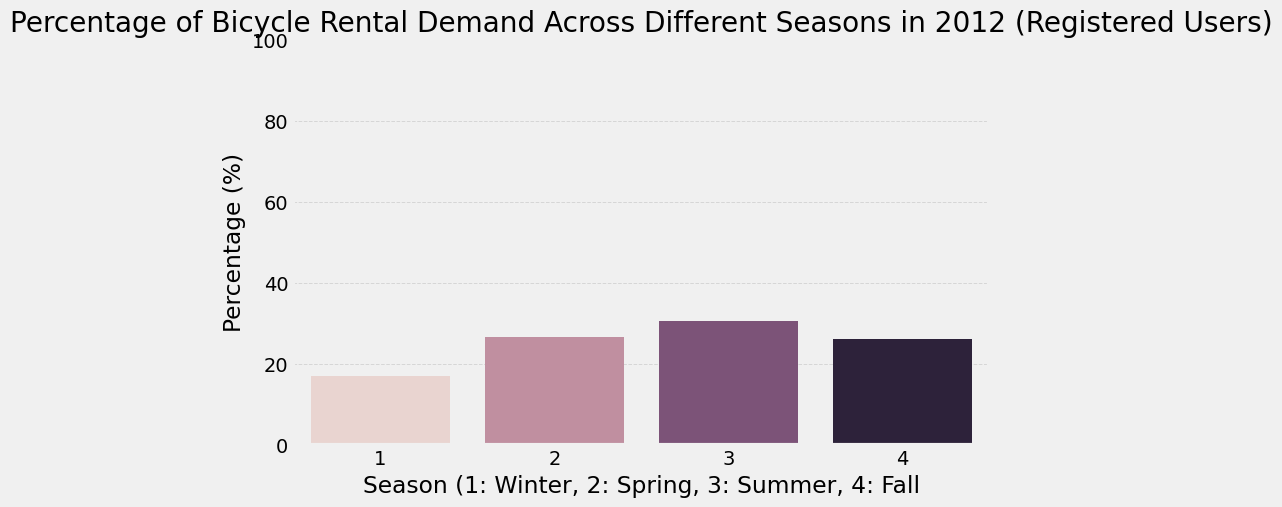

Percentage of Bicycle Rental Demand Across Different Seasons in 2012:
   season  registered  percentage
0       1      282151   16.826643
1       2      445315   26.557257
2       3      510838   30.464853
3       4      438507   26.151248


In [33]:
# Visualisasi dengan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=df_seasonal, x="season", y="percentage", hue="season", legend=False)
plt.title("Percentage of Bicycle Rental Demand Across Different Seasons in 2012 (Registered Users)")
plt.xlabel("Season (1: Winter, 2: Spring, 3: Summer, 4: Fall")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
plt.show()

# Menampilkan persentase di tabel
print("Percentage of Bicycle Rental Demand Across Different Seasons in 2012:")
print(df_seasonal)

**Insights:**
1. **Summer Dominates Bicycle Rentals**:
   - Summer (season 3) records the highest percentage of bicycle rental demand, accounting for **30.47%** of all rentals. This suggests that the warmer and likely more favorable weather conditions in summer play a significant role in encouraging registered users to rent bicycles.

2. **Spring and Fall are Nearly Equal**:
   - Spring (season 2) and Fall (season 4) contribute almost equally to the bicycle rental demand, with **26.56%** and **26.15%**, respectively. This indicates that both seasons have moderate appeal, possibly due to pleasant weather conditions for outdoor activities like cycling.

3. **Winter Shows the Lowest Demand**:
   - Winter (season 1) has the lowest percentage, only **16.83%**, reflecting that colder and possibly harsher weather significantly deters bicycle rentals.

4. **Cumulative Impact of Mild Seasons**:
   - Spring and Fall together account for **52.71%** of the total rentals, demonstrating that transitional seasons have a collective higher appeal than summer alone. This could be due to users taking advantage of milder temperatures.

## Analisis Lanjutan (Opsional)

## Clustering Analysis: How is the demand's pattern between casual and registered users across different seasons?

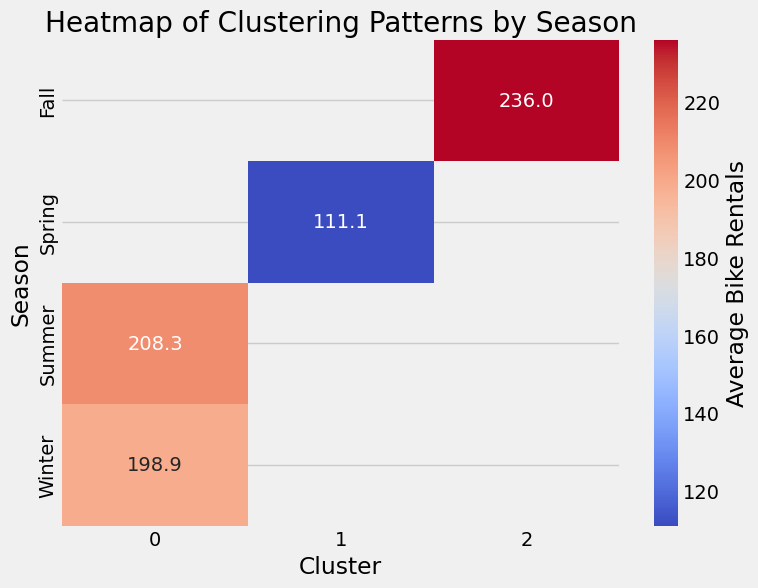


Cluster 1:
   season     casual  registered         cnt  Cluster  Season
0       1  14.290901   96.823668  111.114569        1  Spring

Cluster 0:
   season     casual  registered         cnt  Cluster  Season
1       2  46.160581  162.183488  208.344069        0  Summer
3       4  30.666824  168.202032  198.868856        0  Winter

Cluster 2:
   season     casual  registered         cnt  Cluster Season
2       3  50.287144  185.729093  236.016237        2   Fall


In [34]:
# Tambahkan nama musim untuk interpretasi yang lebih baik
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_cluster_data['Season'] = season_cluster_data['season'].map(season_names)

# Pivot data untuk heatmap
pivot_data = season_cluster_data.pivot(index='Season', columns='Cluster', values='cnt')

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_data, 
    annot=True, 
    fmt='.1f', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Average Bike Rentals'}
)

plt.title('Heatmap of Clustering Patterns by Season')
plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.)
plt.ylabel('Season')
plt.xlabel('Cluster')
plt.show()

for cluster in season_cluster_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(season_cluster_data[season_cluster_data['Cluster'] == cluster])

**Insight:**

1. **Cluster Interpretation:**
   - **Cluster 1 (Spring):**  
     Spring has the lowest average bike usage (111.1 total), primarily due to the low number of casual users.
   - **Cluster 0 (Summer & Winter):**  
     Summer and Winter exhibit similar patterns, with relatively high total usage, around 208 and 199 respectively.
   - **Cluster 2 (Fall):**  
     Fall shows the highest bike usage, with an average total of 236.0, contributed by both casual and registered users.

2. **Seasonal Analysis:**
   - Spring is the season with the lowest bike usage. This could be related to the weather or social activities during this period.
   - Fall is the most popular season, possibly due to pleasant weather and increased recreational activities.
   - Summer and Winter share similar usage patterns, with significant contributions from registered users.

## Conclusion

**Question 1 conclution:**
1. Registered users are the majority than the casual useres.
2. The high percentage of registered users indicates that the service successfully retains users by converting casual users into registered ones, fostering long-term relationships. This might reflect positively on customer satisfaction, the pricing strategy, or the value proposition offered to registered users.

**Question 2 conclution:**
1. The line chart of bike rental demand during rush hours (9 AM - 5 PM) on weekdays in 2012 reveals two distinct peak periods: **around 9 AM** and **around 5 PM**. These spikes correspond to typical commuting hours, indicating that bike rentals were predominantly driven by users traveling to and from work or school during these times. This suggests that bike rentals are heavily utilized as a convenient mode of transportation during daily rush hours.

**Question 3 conclution:**
1. **Summer (Season 3)** has the highest percentage of bicycle rental demand among registered users in 2012, accounting for approximately **30.46%** of the total rentals.
2. **Spring (Season 2)** and **Fall (Season 4)** have comparable demand, with **26.56%** and **26.15%**, respectively.
3. **Winter (Season 1)** shows the lowest demand for bicycle rentals, contributing only **16.83%** to the total.
    This trend indicates that warmer seasons (Spring and Summer) tend to have higher bicycle rental activity, likely due to favorable weather conditions, while colder seasons like Winter exhibit significantly lower activity.

**Clustering Analysis:**   
1. **Cluster 0**, which includes Summer (cnt = 208.3) and Winter (cnt = 198.9), reflects moderate bike rental activity.
2. **Cluster 1 (Spring)** has the lowest average bike rentals (cnt = 111.1) compared to other clusters, likely indicating reduced cycling activity during this season. In contrast.
3. **Cluster 2 (Fall)** shows the highest average bike rentals (cnt = 236.0), suggesting Fall is the most active season for bike usage. 
This pattern might be influenced by seasonal factors such as weather and user preferences for outdoor activities.

In [35]:
hour_df.to_csv("hour_data.csv", index=False)